WORK FLOW
1. GET MED INSURANCE DATASET
2. DATA ANALYSIS AND PREPROCESSING
3. TRAIN TEST SPLIT
4. FIT DATA TO MODEL
5. EVALUATE
6. CREATE A PREDICTIVE SYSTEM

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
med_insurance_data = pd.read_csv('insurance.csv') #loading the csv file into the pandas dataframe

In [5]:
med_insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
med_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
med_insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
med_insurance_data.sex.unique() #Unique values of the sex column

array(['female', 'male'], dtype=object)

In [9]:
med_insurance_data.smoker.unique() #Unique values of the smoker column

array(['yes', 'no'], dtype=object)

In [10]:
med_insurance_data.region.unique() #Unique values of the region column 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
med_insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age distribution')

<Figure size 800x800 with 0 Axes>

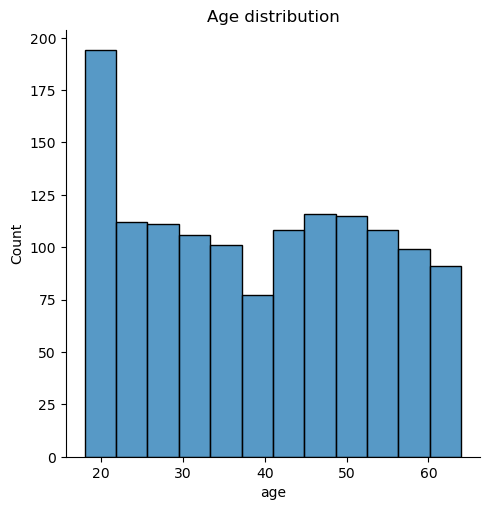

In [12]:
plt.figure(figsize=(8,8))
sns.displot(med_insurance_data['age']) #use displot or histplot for numerical values, and countplot fot categorical
plt.title('Age distribution')


Text(0.5, 1.0, 'Sex Distribution')

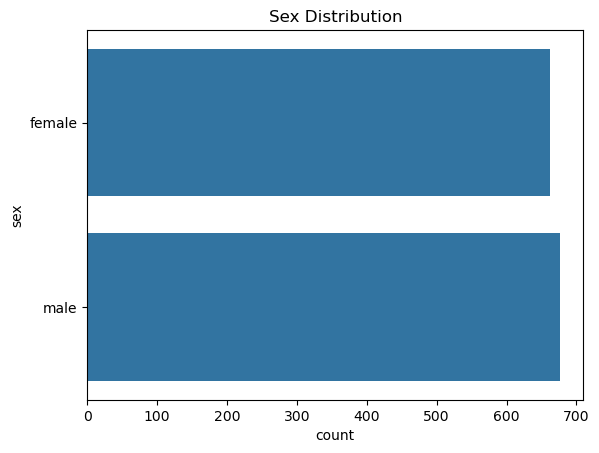

In [13]:
plt.Figure(figsize=(8,8))
sns.countplot(med_insurance_data['sex'])
plt.title('Sex Distribution')

In [14]:
med_insurance_data['sex'].value_counts() #to see the closeness between the values of the columns as shown in the plot

sex
male      676
female    662
Name: count, dtype: int64

Text(0.5, 1.0, 'BMI Distribution')

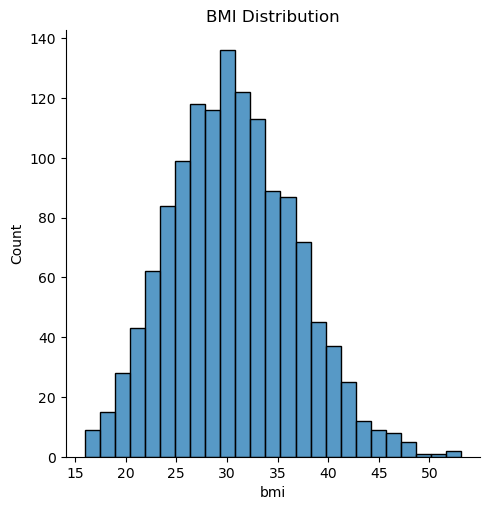

In [15]:
plt.Figure(figsize=(8,8))
sns.displot(med_insurance_data['bmi'])
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Region Distribution')

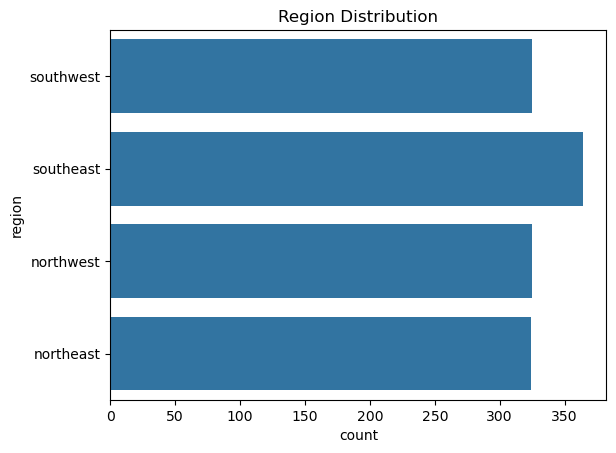

In [16]:
plt.Figure(figsize=(8,8))
sns.countplot(med_insurance_data['region']) #countplot for categorical values
plt.title('Region Distribution')

In [17]:
#Label Endoding
med_insurance_data.replace({
    'sex':{'female':0, 'male':1}, #encoding the sex column
    'smoker':{'no':0, 'yes':1}, #encoding the smoker column
    'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3} #encoding the region column
}, inplace= True)

C:\Users\USER\AppData\Local\Temp\ipykernel_980\2435220982.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  med_insurance_data.replace({


In [18]:
med_insurance_data #to check the label encoding

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [19]:
#Separating features from the target
X= med_insurance_data.drop('charges', axis=1)
y= med_insurance_data['charges']

In [20]:

print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       2

[1338 rows x 6 columns]


In [21]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [22]:
med_insurance_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [23]:
med_insurance_data_corr = med_insurance_data.corr()

In [24]:
med_insurance_data.corr() #to see the correlation between the features and target

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


TRAIN TEST SPLIT

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


FIT DATA INTO MODEL

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
Train_pred = model.predict(X_train)
Test_pred = model.predict(X_test)

EVALUATION

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error

In [33]:
print(f'R2 score for training data: {r2_score(y_train, Train_pred)}')
print(f'R2 score for testing data: {r2_score(y_test, Test_pred)}')

R2 score for training data: 0.7519923667088932
R2 score for testing data: 0.7445422986536503


In [34]:
print(r2_score(y_train, Train_pred)- r2_score(y_test, Test_pred)) #to check for overfitting or underfitting

0.007450068055242953


In [35]:
print(f'Mean Absolute Error for training data: {mean_absolute_error(y_train, Train_pred)}')
print(f'Mean Absolute Error for testing data: {mean_absolute_error(y_test, Test_pred)}')

Mean Absolute Error for training data: 4140.028379854145
Mean Absolute Error for testing data: 4285.219437633698


CREATING A PREDICTIVE SYSTEM

In [42]:
input_data = (31,0,25.74,0,0,1)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[3911.4481614]


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31,female,25.74,0,no,southeast,3756.6216